

```
Practica 7: Transformada rapida de Fourier para señales discretas. 
Laboratorio: Procesamiento Digital de señales
Harold Adrián Gómez Gil
```


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:


def dftmatrix(N, Nfft):
#construct DFT matrix
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n = np.arange(N)
    U = np.matrix(np.exp(1j* 2*np.pi/Nfft *k*n[:,None]))
    return U/np.sqrt(Nfft)

<h1>2. Generación de señales y Transformada de Fourier.</h2>


<p>1. Teniendo un sistema con fs = 2 khz, cree un vector de tiempo de 0.8 segundos y genere las siguientes señales de acuerdo con el último número de su cédula (C).</p>

<li> Impares:
    <ul>x1 = sin(2πf1t)</ul>
     <ul>x2 = sin(2πf2t)</ul>
     <ul>x3 = sin(2πf3t)</ul>
     <ul>x4 = sin(2πf4t)</ul>
 </li>

<li> Pares:
    <ul>x1 = cos(2πf1t)</ul>
     <ul>x2 = cos(2πf2t)</ul>
     <ul>x3 = cos(2πf3t)</ul>
     <ul>x4 = cos(2πf4t)</ul>
 </li>

 <li> Teniendo:
    <ul>f1 = (1+C)*15</ul>
     <ul>f2 = (2*C)+20</ul>
     <ul>f3 = (2+C)*(50-90)</ul>
     <ul>f4 = (4*C)+80</ul>
 </li>

<p>2. Grafique cada señal en una sola figura</p>

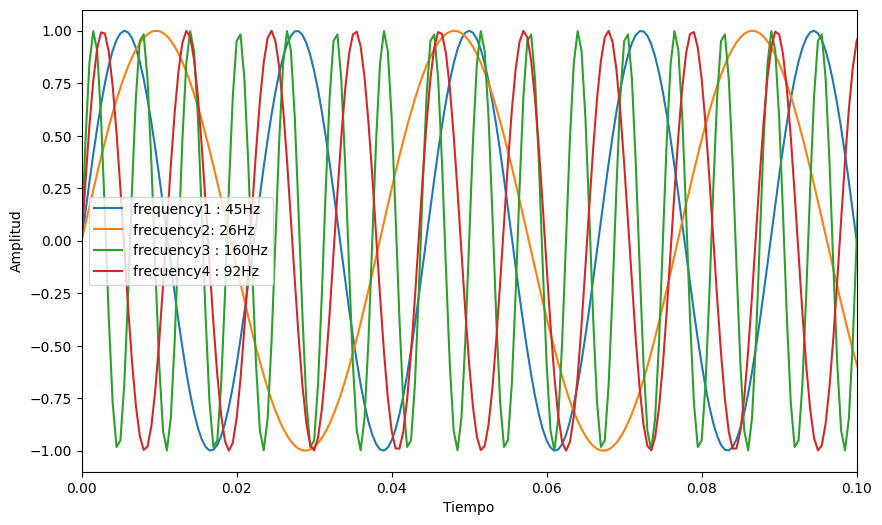

In [102]:
fs=2e3
t= np.arange(0,0.8,1/fs)
C=3 #valor final de la CC
f_1=(1*C)*15
f_2=2*C+20
f_3=(2+C)*50-90
f_4= 4*C+80

#señales impares
x_1= np.sin(2*np.pi*f_1*t)
x_2=np.sin(2*np.pi*f_2*t)
x_3=np.sin(2*np.pi*f_3*t)
x_4=np.sin(2*np.pi*f_4*t)

plt.figure(figsize=(10,6))
plt.xlim(0 , 0.1)
plt.plot(t,x_1,label="frequency1 : "  + str(f_1) + "Hz")
plt.plot(t,x_2,label="frecuency2: "  + str(f_2) + "Hz")
plt.plot(t,x_3,label="frecuency3 : "  + str(f_3) + "Hz")
plt.plot(t,x_4,label="frecuency4 : "  + str(f_4) + "Hz")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

<p>3. Calcule la transformada de Fourier usando <strong>U</strong> y Nfft=4096 para cada señal</p>

C:\Users\Asus\AppData\Local\Temp\ipykernel_26672\1698091053.py:44: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,1)


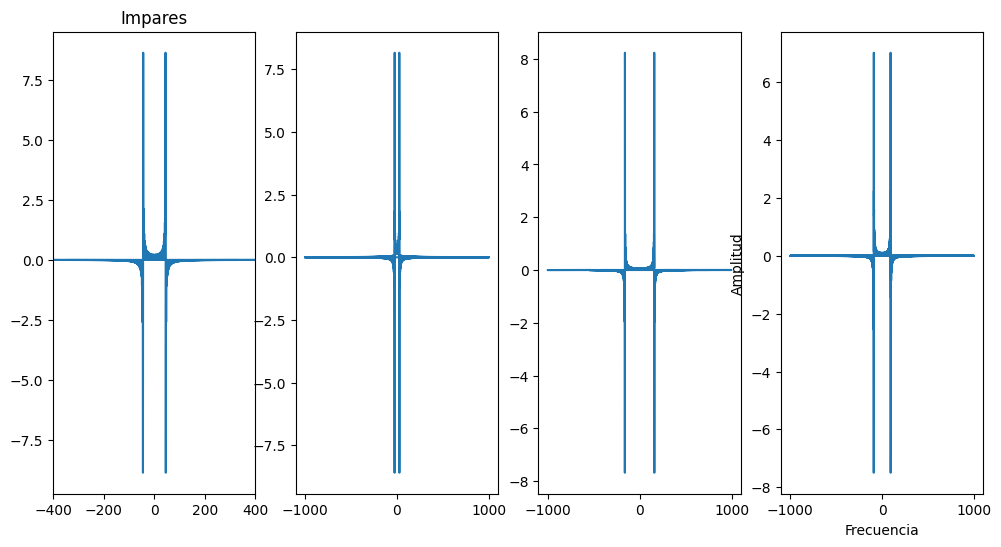

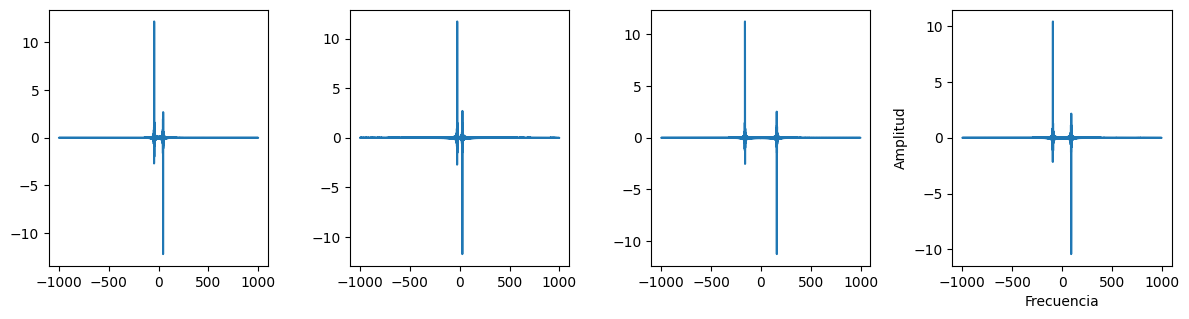

In [103]:
Nfft=4096
'''
Mirando el argumento N, este puede verse como el vector de tiempo, ya que todos van a tener la misma cantidad de muestras
y además se está dando por la frecuencia de muestreo fs y el Ts. 
Por otro lado, como se requiere hacer una multiplicación matricial, se debe hacer conversión de vector fila a vector columna.
'''
N=len(t) #1600
U= dftmatrix(N,Nfft)
frequency = np.hstack((np.arange(0, Nfft/2-1), np.arange(-Nfft/2, 1))) * fs / Nfft  # Frecuencia normalizada

x_1.shape=(len(x_1),1) # Convierto en vector columna para poder multiplicar con la matriz
X1=U.H*x_1[:] 

x_2.shape=(len(x_2),1) 
X2=U.H*x_2[:] 


x_3.shape=(len(x_3),1) 
X3=U.H*x_3[:]

x_4.shape=(len(x_4),1) 
X4=U.H*x_4[:] 



plt.figure(figsize=(12,6))
plt.subplot(1,4,1)
plt.xlim(-400,400)
plt.title("Impares")
plt.plot(frequency , np.real(X1)) 
plt.subplot(1,4,2)
plt.plot(frequency , np.real(X2))
plt.subplot(1,4,3)
plt.plot(frequency , np.real(X3))
plt.subplot(1,4,4)
plt.plot(frequency , np.real(X4))
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")

plt.figure(figsize=(12,6))
plt.subplot(1,4,1)
plt.xlim(-400,400)
plt.title("pares")
plt.subplot(2,4,1)
plt.plot(frequency , np.imag(X1))
plt.subplot(2,4,2)
plt.plot(frequency , np.imag(X2))
plt.subplot(2,4,3)
plt.plot(frequency , np.imag(X3))
plt.subplot(2,4,4)
plt.plot(frequency , np.imag(X4))
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.tight_layout()



<p>Es de esperarse que cuando se trata de una señal impar, al graficar la parte imaginaria ( que corresponde a la parte impar) , se esperaría que el espectro usando el algoritmo de la FFT, diera valores en cero para la parte real , sin embargo cuando se implementa el algoritmo, los valores no corresponden a lo que se esperaría, lo idea sería que la parte imaginaria si de valores en amplitud, pero la parte real no lo haga.</p>


<p>5.Calcule la señal Xt</p>

In [104]:
xt=np.sin(2*np.pi*f_1*t)+np.sin(2*np.pi*f_2*t)+np.sin(2*np.pi*f_3*t)+np.sin(2*np.pi*f_4*t)

<p>6. Graf ́ıque la la se ̃nal en el tiempo y el espectro de la transformada. ¿Qu ́e se puede concluir?</p>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


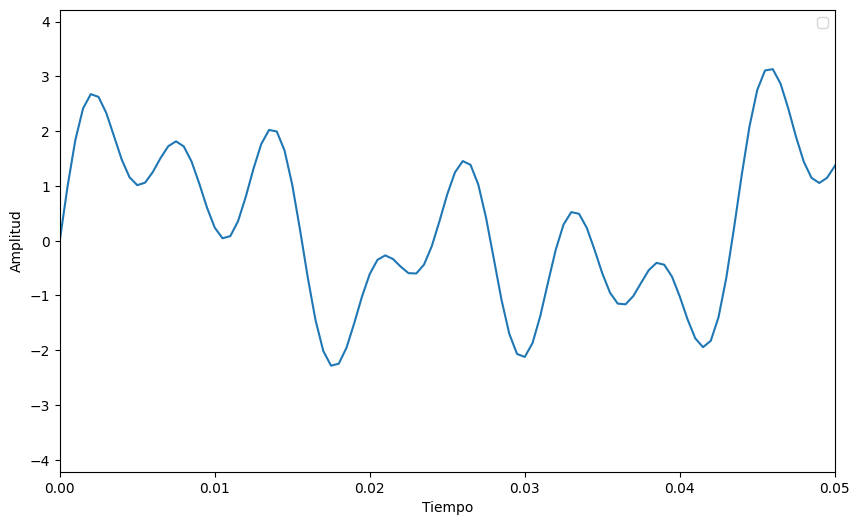

In [105]:
plt.figure(figsize=(10,6))
plt.plot(t,xt)
plt.xlim(0,0.05)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

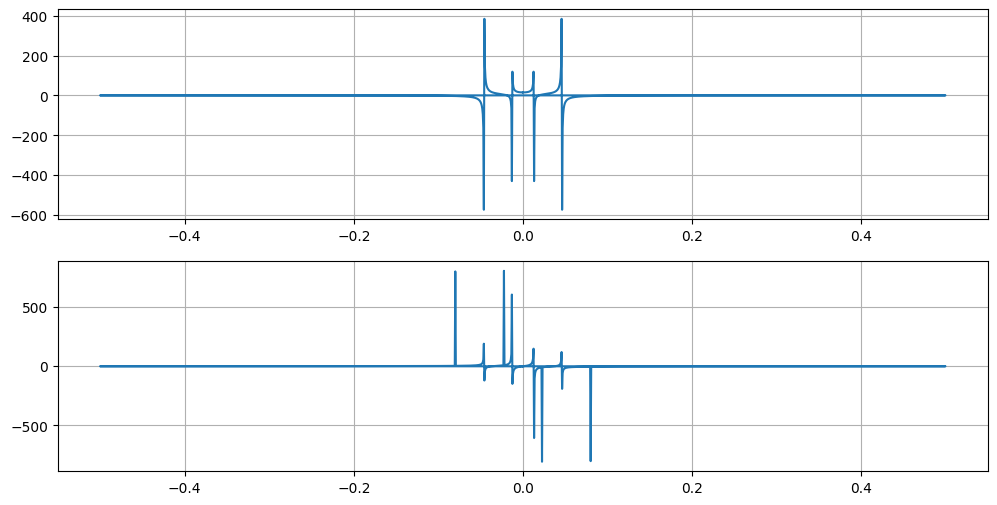

In [106]:
xf = np.fft.fft(xt)
freq = np.fft.fftfreq(t.shape[-1])
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(freq, xf.real)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(freq, xf.imag)
plt.grid()

In [94]:
print(xt.reshape(-1,).shape)

(1600,)


<p>7. A dos de las 4 señales agreguele offset</p>

In [107]:
xtn=np.sin(2*np.pi*f_1*t - np.pi)+np.sin(2*np.pi*f_2*t - np.pi)+np.sin(2*np.pi*f_3*t)+np.sin(2*np.pi*f_4*t)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


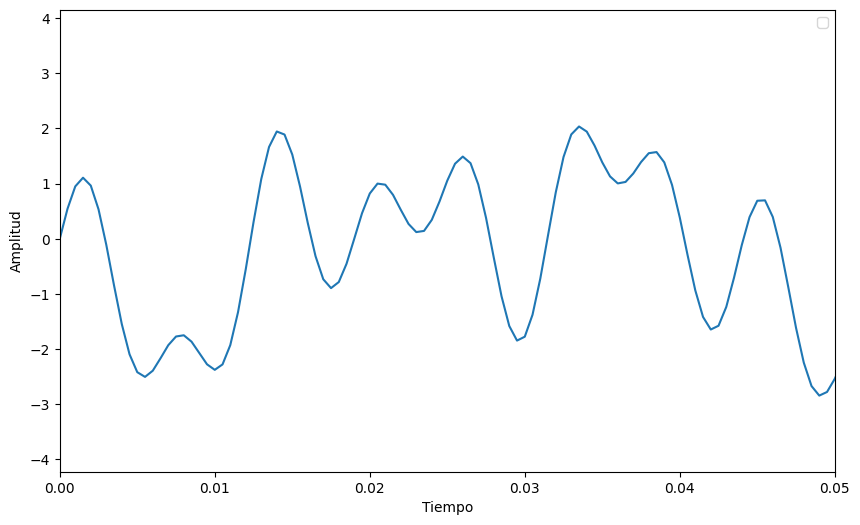

In [108]:
plt.figure(figsize=(10,6))
plt.plot(t,xtn)
plt.xlim(0,0.05)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

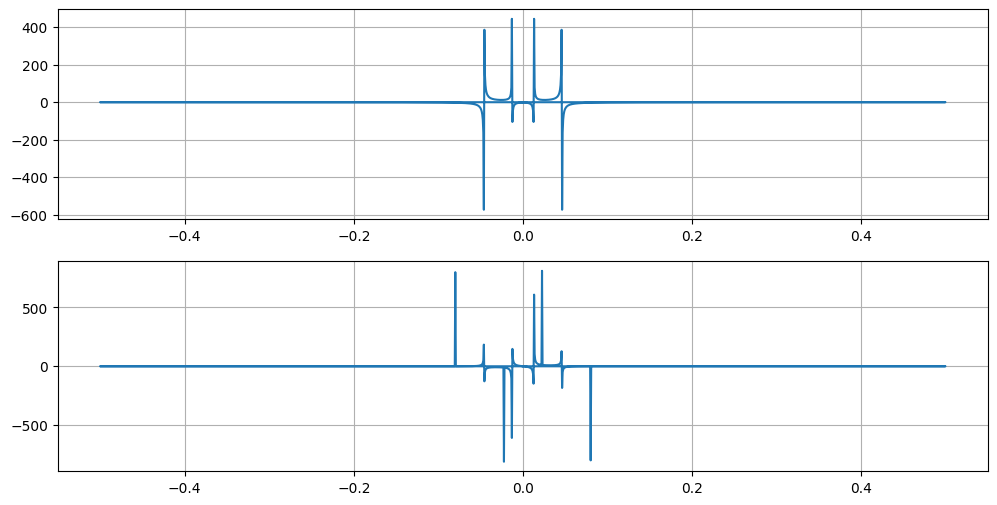

In [109]:
xfn = np.fft.fft(xtn)
freqn = np.fft.fftfreq(t.shape[-1])
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(freqn, xfn.real)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(freq, xfn.imag)
plt.grid()

<h1>3.Recuperación de la señal</h1>

In [110]:
inversa=np.fft.ifft(xfn.T)


<h1>4.Conclusiones</h1>

<li>Considerando si es una señal par o una impar, al momento de graficar el espectro, se van a perder unas componentes, bien sea su parte real o imaginaria que hace alusion a la pariedad o impariedad.</li>
